In [78]:
import urllib
import requests
import bs4
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from pypdf import PdfReader


from string import punctuation

In [64]:
url = 'https://en.wikipedia.org/wiki/Rajgad'

headers = {
    'User-Agent': 'Custom-Script/1.9 (tushar@gmail.com)',
    'Accept-Language': 'en-US, en;q=0.5'
}

In [65]:
response = requests.get(url, headers=headers)
# response.text
response.text

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Rajgad - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-featur

In [66]:
soup = BeautifulSoup(response.text,'html.parser')
type(soup)

bs4.BeautifulSoup

In [67]:
soup.find('title')

<title>Rajgad - Wikipedia</title>

In [68]:
text = soup.get_text()
print(text)





Rajgad - Wikipedia






























Jump to content







Main menu





Main menu
move to sidebar
hide



		Navigation
	


Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us





		Contribute
	


HelpLearn to editCommunity portalRecent changesUpload fileSpecial pages



















Search











Search






















Appearance
















Donate

Create account

Log in








Personal tools





Donate Create account Log in




























Contents
move to sidebar
hide




(Top)





1
History




Toggle History subsection





1.1
List of chronological events










2
Tourism








3
Gallery








4
See also








5
References








6
External links


















Toggle the table of contents







Rajgad



11 languages




EspañolFrançaisहिन्दीעבריתमराठीمصرىनेपाल भाषाپنجابیதமிழ்Türkçeاردو

Edit links











ArticleTalk





English

















ReadEditView history







Tools





Tools


In [69]:
tokens = word_tokenize(text)
text = ' '.join(tokens)
text

"Rajgad - Wikipedia Jump to content Main menu Main menu move to sidebar hide Navigation Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us Contribute HelpLearn to editCommunity portalRecent changesUpload fileSpecial pages Search Search Appearance Donate Create account Log in Personal tools Donate Create account Log in Contents move to sidebar hide ( Top ) 1 History Toggle History subsection 1.1 List of chronological events 2 Tourism 3 Gallery 4 See also 5 References 6 External links Toggle the table of contents Rajgad 11 languages EspañolFrançaisहिन्दीעבריתमराठीمصرىनेपाल भाषाپنجابیதமிழ்Türkçeاردو Edit links ArticleTalk English ReadEditView history Tools Tools move to sidebar hide Actions ReadEditView history General What links hereRelated changesUpload filePermanent linkPage informationCite this pageGet shortened URLDownload QR code Print/export Download as PDFPrintable version In other projects Wikimedia CommonsWikivoyageWikidata item Appearance move to sidebar hid

<Axes: xlabel='Samples', ylabel='Counts'>

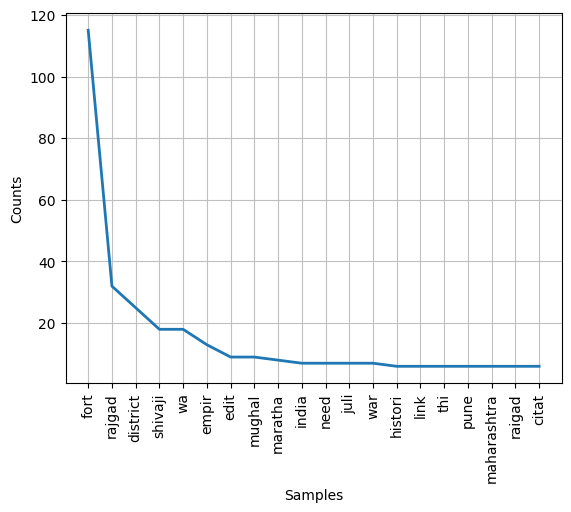

In [74]:
#printing most frequest words

swords = stopwords.words('english')
ps = PorterStemmer()

valid_words = [ps.stem(x.lower()) for x in tokens #stemming 
               if 
               x.lower() not in swords  #removing stopwords 
               and x.isalnum() ]  #removing puncuations


freq = FreqDist(valid_words)
freq.plot(20)

<Axes: xlabel='Samples', ylabel='Counts'>

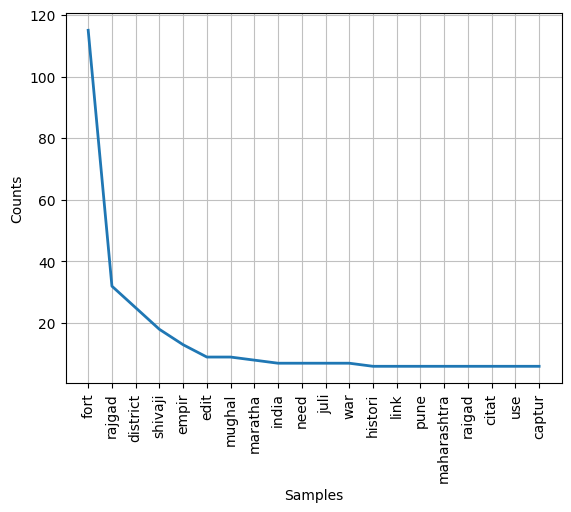

In [77]:
#combining all 
url = 'https://en.wikipedia.org/wiki/Rajgad'

headers = {
    'User-Agent': 'Custom-Script/1.9 (tushar@gmail.com)',
    'Accept-Language': 'en-US, en;q=0.5'
}
swords = stopwords.words('english') 
ps = PorterStemmer()  #stemmer object

response = requests.get(url,headers = headers) #web page from url
soup = BeautifulSoup(response.text, 'html.parser') # to get content from html page
text = soup.get_text() #storing text
tokens = word_tokenize(text)  # creating tokens to remove extra spaces 
tokens = ' '.join(tokens) # combining tokens to form single space separated sentence

#getting 20 most frequest words
tokens1 = word_tokenize(tokens) #tokens 
tokens2 = [t for t in tokens1 if t.isalnum()] #tokens withouts puncuations
tokens3 = [ps.stem(x.lower()) for x in tokens2 if x.lower() not  in swords] #removing stopwords and stemming tokens

freq = FreqDist(tokens3)  #freq object for tokens
freq.plot(20) #ploting 20 most frequent tokens 